In [342]:
import pandas as pd #for data cleaning
import numpy as np #for numerical data handling
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for advanced visualization
from scipy import stats #statistical tests

# **Data Cleaning**

## **Extract data from customer sheet in messy excel**


In [343]:
file_path = 'Bank_Churn_Messy.xlsx'

In [344]:
customer_df = pd.read_excel(file_path,sheet_name=0)
customer_df = pd.DataFrame(customer_df)

In [345]:
customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


## **CustomerID Type Checking**

In [346]:
customer_df['CustomerId'].dtype

dtype('int64')

In [347]:
customer_df['CustomerId'] = customer_df['CustomerId'].astype('string')

In [348]:
customer_df['CustomerId'].dtype

string[python]

## **Extract data from account info sheet in messy excel**

In [349]:
account_df = pd.read_excel(file_path,sheet_name=1)
account_df = pd.DataFrame(account_df)

In [350]:
account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [351]:
account_df['CustomerId'].dtype

dtype('int64')

In [352]:
account_df['CustomerId'] = account_df['CustomerId'].astype('string')

In [353]:
account_df['CustomerId'].dtype

string[python]

## **Merge Data from account and customer**

In [354]:
bank_account_df = account_df.merge(customer_df,on='CustomerId',how='left')

In [355]:
account_df['CustomerId'].count()

np.int64(10002)

In [356]:
customer_df['CustomerId'].count()

np.int64(10001)

In [357]:
bank_account_df['CustomerId'].count()

np.int64(10004)

## **Check Duplicate Rows**

In [358]:
bank_account_df[bank_account_df.duplicated(keep=False)]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
10000,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10001,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10002,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10003,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78


In [359]:
bank_account_df = bank_account_df.drop_duplicates()

In [360]:
bank_account_df[bank_account_df.duplicated(keep=False)]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary


In [361]:
bank_account_df['CustomerId'].count()

np.int64(10000)

In [362]:
bank_account_df.columns = bank_account_df.columns.str.strip().str.lower().str.replace(' ','_')

In [363]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure_x',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure_y', 'estimatedsalary'],
      dtype='object')

## **Check Duplicate Columns**

In [364]:
(bank_account_df['tenure_x'] == bank_account_df['tenure_y']).unique()

array([ True])

In [365]:
bank_account_df.drop(columns='tenure_y',inplace=True)

In [366]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure_x',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'estimatedsalary'],
      dtype='object')

## **Standardizing Column Name for preventing coding error**

In [367]:
bank_account_df = bank_account_df.rename(columns={'tenure_x':'tenure'})

In [368]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'estimatedsalary'],
      dtype='object')

## **Check DataType Mismatch & Fix**

In [369]:
bank_account_df.dtypes

customerid         string[python]
balance                    object
numofproducts               int64
hascrcard                  object
tenure                      int64
isactivemember             object
exited                      int64
surname                    object
creditscore                 int64
geography                  object
gender                     object
age                       float64
estimatedsalary            object
dtype: object

In [370]:
bank_account_df['hascrcard'].unique()

array(['Yes', 'No'], dtype=object)

In [371]:
bank_account_df['estimatedsalary']

0        €101348.88
2        €112542.58
3        €113931.57
4         €93826.63
5          €79084.1
            ...    
9996      €96270.64
9997     €101699.77
9998      €42085.58
9999      €92888.52
10000     €38190.78
Name: estimatedsalary, Length: 10000, dtype: object

In [372]:
bank_account_df[['estimatedsalary','balance']] = bank_account_df[['estimatedsalary','balance']].astype('string')

In [373]:
# bank_account_df['estimatedsalary'].astype(float)

In [374]:
bank_account_df[['estimatedsalary','balance']] = bank_account_df[['estimatedsalary','balance']].replace(r'[€,]','',regex=True)

In [375]:
bank_account_df[['estimatedsalary','balance']] = bank_account_df[['estimatedsalary','balance']].astype(float)

In [376]:
bank_account_df.dtypes

customerid         string[python]
balance                   float64
numofproducts               int64
hascrcard                  object
tenure                      int64
isactivemember             object
exited                      int64
surname                    object
creditscore                 int64
geography                  object
gender                     object
age                       float64
estimatedsalary           float64
dtype: object

In [377]:
bank_account_df['hascrcard'].unique()

array(['Yes', 'No'], dtype=object)

In [378]:
bank_account_df['isactivemember'].unique()

array(['Yes', 'No'], dtype=object)

In [379]:
bank_account_df[['hascrcard','isactivemember']] = bank_account_df[['hascrcard','isactivemember']].astype('string').replace({'Yes':'1','No':'0'})

In [380]:
bank_account_df[['hascrcard','isactivemember']] = bank_account_df[['hascrcard','isactivemember']].astype('int')

In [381]:
bank_account_df[['geography','gender']] = bank_account_df[['geography','gender']].astype('string')

In [382]:
bank_account_df['geography'] = bank_account_df['geography'].str.lower().str.strip()

In [383]:
bank_account_df['gender'] = bank_account_df['gender'].str.lower().str.strip()

In [384]:
bank_account_df.map(type).nunique()

customerid         1
balance            1
numofproducts      1
hascrcard          1
tenure             1
isactivemember     1
exited             1
surname            2
creditscore        1
geography          1
gender             1
age                1
estimatedsalary    1
dtype: int64

In [385]:
bank_account_df.isnull().sum()

customerid         0
balance            0
numofproducts      0
hascrcard          0
tenure             0
isactivemember     0
exited             0
surname            3
creditscore        0
geography          0
gender             0
age                3
estimatedsalary    0
dtype: int64

In [386]:
bank_account_df[bank_account_df['age'].isnull()]

,customerid,balance,numofproducts,hascrcard,tenure,isactivemember,exited,surname,creditscore,geography,gender,age,estimatedsalary
29,15728693,141349.43,1,1,3,1,0,NaN,574,germany,female,NaN,-999999.0
122,15580203,120193.42,1,0,6,0,0,NaN,674,spain,male,NaN,-999999.0
9390,15756954,0.00,1,1,2,1,0,NaN,538,france,female,NaN,-999999.0


In [387]:
bank_account_df = bank_account_df.dropna(subset=['balance','age','estimatedsalary','creditscore'])

In [388]:
bank_account_df['age'] = bank_account_df['age'].astype(int)

In [389]:
bank_account_df.dtypes

customerid         string[python]
balance                   float64
numofproducts               int64
hascrcard                   int64
tenure                      int64
isactivemember              int64
exited                      int64
surname                    object
creditscore                 int64
geography          string[python]
gender             string[python]
age                         int64
estimatedsalary           float64
dtype: object

In [390]:
bank_account_df = bank_account_df.drop(columns=['customerid','surname'])

In [391]:
bank_account_df.map(type).nunique()

balance            1
numofproducts      1
hascrcard          1
tenure             1
isactivemember     1
exited             1
creditscore        1
geography          1
gender             1
age                1
estimatedsalary    1
dtype: int64

## **Standardize categorical data**

In [392]:
bank_account_df['geography'].unique()

<StringArray>
['fra', 'spain', 'french', 'france', 'germany']
Length: 5, dtype: string

In [393]:
bank_account_df['geography'] = bank_account_df['geography'].replace(['fra','french'],'france')

In [394]:
bank_account_df['geography'].unique()

<StringArray>
['france', 'spain', 'germany']
Length: 3, dtype: string

In [395]:
bank_account_df['gender'].unique()

<StringArray>
['female', 'male']
Length: 2, dtype: string

In [396]:
bank_account_df.describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,76482.679807,1.530359,0.515055,5.013204,0.515055,0.203761,650.545364,38.922077,100092.222656
std,62397.174721,0.581669,0.499798,2.892364,0.499798,0.402814,96.657932,10.489072,57518.775702
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,18.000000,11.580000
25%,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,584.000000,32.000000,50974.570000
50%,97188.620000,1.000000,1.000000,5.000000,1.000000,0.000000,652.000000,37.000000,100236.020000
75%,127642.440000,2.000000,1.000000,7.000000,1.000000,0.000000,718.000000,44.000000,149399.700000
max,250898.090000,4.000000,1.000000,10.000000,1.000000,1.000000,850.000000,92.000000,199992.480000


There are 30% no saving customers and saving customers' balance behaviors are stable. To study difference between no saving and saving customers. While most customers used only 1 or 2 products, few customers only used more than 2 products. Credit card is direct related with isactivemember. To increase more engagement, we should provide credit card plan. Most customers are long term customers around 5 years and longest term is 10 year old customers. New customers like 0 and oldest customers like 10 is quite few. 20% customers are churner so we need to explore why churn. There are few customers with worst credit score. although there are around 6% customers who have below 500 credit score, among them 30% of low credit score customers have higher income and saving. We can approve suitable low risk loan using strict policies to prevent churn customers. Our target customer is around 32 to 44. expanded range is 24- 60. Customer age do not impact on saving. 

In [417]:
bank_account_df['age_group'] = pd.cut(bank_account_df['age'],bins=[17,20,23,31,44,60,120],labels=['18-20','21-23','24-31','32-44','45-60','above 60'])
bank_account_df['age_group'].value_counts()

age_group
32-44       5285
24-31       2047
45-60       1876
above 60     464
21-23        236
18-20         89
Name: count, dtype: int64

In [423]:
bank_account_df[bank_account_df['balance']==0]['age_group'].value_counts()

age_group
32-44       1935
24-31        787
45-60        600
above 60     167
21-23         91
18-20         36
Name: count, dtype: int64

In [414]:
bank_account_df[bank_account_df['creditscore']< 500].describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,80294.231329,1.515823,0.468354,5.077532,0.468354,0.237342,462.925633,38.908228,103307.478418
std,62792.369008,0.579417,0.499393,2.824839,0.499393,0.425790,30.113033,10.265777,57842.565848
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,19.000000,878.870000
25%,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,445.000000,32.000000,56598.880000
50%,100697.760000,1.000000,0.000000,5.000000,0.000000,0.000000,470.000000,37.000000,101297.595000
75%,131097.260000,2.000000,1.000000,8.000000,1.000000,0.000000,487.000000,44.000000,155828.382500
max,221532.800000,4.000000,1.000000,10.000000,1.000000,1.000000,499.000000,84.000000,199505.530000


In [416]:
bank_account_df[(bank_account_df['balance']>=100000) &
                 (bank_account_df['estimatedsalary']>=100000) &
                 (bank_account_df['creditscore']<500)
                 ].describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,135566.586975,1.469136,0.419753,5.141975,0.419753,0.228395,461.635802,39.000000,153647.638951
std,23136.398341,0.601993,0.495049,2.906124,0.495049,0.421100,33.325751,11.017772,28212.792104
min,101257.160000,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,19.000000,100447.530000
25%,117314.232500,1.000000,0.000000,2.250000,0.000000,0.000000,446.750000,32.000000,128459.090000
50%,131601.650000,1.000000,0.000000,6.000000,0.000000,0.000000,468.500000,37.000000,155041.060000
75%,152011.547500,2.000000,1.000000,8.000000,1.000000,0.000000,485.750000,44.000000,176621.162500
max,221532.800000,4.000000,1.000000,10.000000,1.000000,1.000000,499.000000,74.000000,198714.290000


In [412]:
bank_account_df['tenure'].value_counts()

tenure
2     1047
1     1035
7     1028
8     1025
5     1012
3     1008
4      989
9      984
6      966
10     490
0      413
Name: count, dtype: int64

In [401]:
pd.crosstab(bank_account_df['hascrcard'],bank_account_df['exited'],rownames=['Has Credit Card'],colnames=['Churn Status'])

Churn Status,0,1
Has Credit Card,,
0,3546,1302
1,4414,735


In [403]:
bank_account_df[(bank_account_df['hascrcard']==0) &
                 (bank_account_df['exited'] == 0)
                ].describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,3546.000000,3546.000000,3546.0,3546.000000,3546.0,3546.0,3546.000000,3546.000000,3546.000000
mean,72035.243421,1.554992,0.0,5.127750,0.0,0.0,648.907501,35.470671,100342.685237
std,63300.623286,0.507150,0.0,2.864851,0.0,0.0,96.228741,7.147478,57433.884371
min,0.000000,1.000000,0.0,0.000000,0.0,0.0,408.000000,18.000000,96.270000
25%,0.000000,1.000000,0.0,3.000000,0.0,0.0,582.250000,31.000000,50956.250000
50%,91776.980000,2.000000,0.0,5.000000,0.0,0.0,650.000000,35.000000,100168.240000
75%,127059.967500,2.000000,0.0,8.000000,0.0,0.0,716.000000,40.000000,148944.647500
max,221532.800000,3.000000,0.0,10.000000,0.0,0.0,850.000000,77.000000,199992.480000


In [409]:
potential_active_customers = bank_account_df[(bank_account_df['hascrcard']==0) &
                 (bank_account_df['exited'] == 0) &
                 (bank_account_df['creditscore'] >= 700) &
                 (bank_account_df['estimatedsalary'] >= 100000) &
                 (bank_account_df['balance'] >= 100000)
                ]

In [410]:
(len(potential_active_customers)/len(bank_account_df))*100

2.43072921876563

In [411]:
pd.crosstab(potential_active_customers['geography'],potential_active_customers['gender'],rownames=['Geography'],colnames=['Gender'])

Gender,female,male
Geography,,
france,42,74
germany,50,37
spain,17,23


## Valuable Insight to add StreamLit

We can improve **active rate** by providing **credit card** to this **2.4% inactive customers** who have high credit score, saving and income. Credit card and active member has direct correlation. We need to target france and germany which most potential customers exists. In france, male potential customers are more than female and in germany, female customers are more. It can be valuable for marketing team, key account teams of credit card campaign.

In [399]:
bank_account_df['hascrcard'].value_counts(normalize=True)

hascrcard
1    0.515055
0    0.484945
Name: proportion, dtype: float64

<Axes: xlabel='balance', ylabel='Count'>

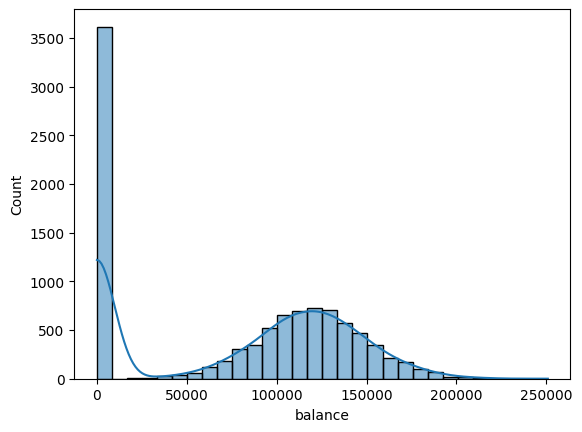

In [398]:
sns.histplot(data=bank_account_df,x='balance',bins=30,kde=True)